In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd "/content/gdrive/My Drive/"
%cd candlestick_patterns/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/My Drive/candlestick_patterns


In [2]:
pip install --upgrade mplfinance

**Plotting Candlesticks**

Saving each day's candlestick pattern into a folder

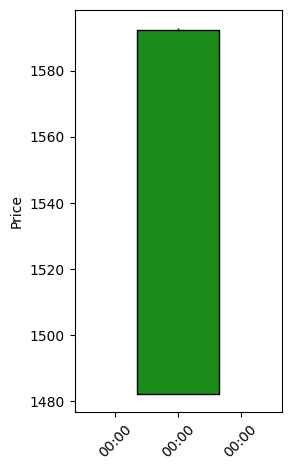

In [3]:
import pandas as pd
import os
import mplfinance as mpf
df = pd.read_csv("NIFTY 50.csv",index_col="Date")
df.index = pd.to_datetime(df.index,dayfirst=True)
mc = mpf.make_marketcolors(up='g',down='r')
s  = mpf.make_mpf_style(marketcolors=mc)
kwargs = dict(type='candle')
#path=os.path.join(os.getcwd(),'triple')
#os.chdir(path)
#for i in range (5353):
#    mpf.plot(df[i:i+3],**kwargs,style=s,scale_width_adjustment=dict(candle=1),figratio=(8,16),savefig=dict(fname='three'+str(df.index[i])[:10],dpi=100,pad_inches=0.25))
#    print(i)

mpf.plot(df[0:1],**kwargs,style=s,scale_width_adjustment=dict(candle=1),figratio=(8,16))

**Loading and Resizing Data**

Resizing data into a (224,244,3)

In [4]:
import os
zip_path = '/content/gdrive/My Drive/candlestick_patterns/single.zip'
!cp "{zip_path}" .
!unzip -q single.zip

cp: '/content/gdrive/My Drive/candlestick_patterns/single.zip' and './single.zip' are the same file


In [5]:
import cv2
import numpy as np
import pandas as pd
import mplfinance as mpf
import os

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten,Dropout,InputLayer
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


from sklearn.model_selection import train_test_split

In [6]:
def get_data(data_dir=os.getcwd()):
    data = [] 
    i=0
    path = os.path.join(data_dir, "doji")
    for img in os.listdir(path):
      try:
          img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
          resized_arr = cv2.resize(img_arr, (64, 64)) # Reshaping images to preferred size
          data.append(resized_arr)
          print(i)
          i=i+1
      except Exception as e:
          print(e)


    return np.array(data)

In [ ]:
data=get_data()

(-0.5, 63.5, 63.5, -0.5)

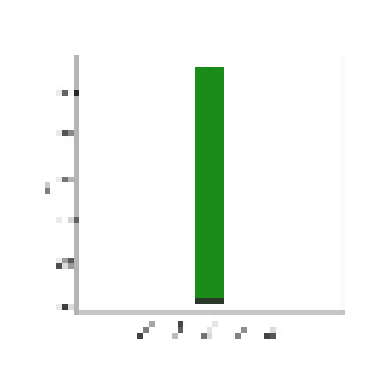

In [8]:
plt.imshow(data[0])
plt.axis('off')

**Doji**

---



**Determing Target Label**

Doji - 1

Other - 0

In [9]:
df['doji']=abs(df.Open-df.Close)/df[["Open","Close"]].max(axis=1) <=0.005
df["doji"] = df["doji"].astype(int)
df['doji'].value_counts()
df['doji'].to_csv("Y_doji.csv")

**Loading Target Label**

In [10]:
y=pd.read_csv('/content/gdrive/My Drive/candlestick_patterns/Y_doji.csv',index_col="Date")
y  = to_categorical(y)
y.shape

(5353, 2)

In [11]:
def split(X,y):
  X=X/255.0
  X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
  X_train,X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
  return X_train,y_train,X_val,y_val,X_test,y_test

**Initializing the CNN Model**

In [13]:
def modeldoji():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  #model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024,kernel_initializer='normal',activation="relu"))
  #model.add(Dropout(0.4))
  #model.add(Dense(256,kernel_initializer='normal',activation="relu"))
  model.add(Dense(2, activation="softmax"))

  model.summary()

  return model

In [12]:
X_train,y_train,X_val,y_val,X_test,y_test = split(data,y)

**Model Training**

In [14]:
from tensorflow.keras.optimizers import SGD
model=modeldoji()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=256, epochs=20,validation_data=(X_val,y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              31491072  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 2050      
Total params: 31,494,018
Trainable params: 31,494,018
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
13/13 [==============================] - 33s 99ms/step - loss: 24.7036 - accuracy: 0.5469 - val_loss: 6.9138 - val_accuracy: 0.5724
Epoch 2/20
13/13 [==============================] - 1s 69ms/step - loss: 2.8038 - accuracy: 0.5643 - val_loss: 0.8331 - val_accuracy: 0.7460
Epoch 3/20
13/13 [==============================] - 1s 64ms/step - loss: 0.9136 - accuracy: 0.7334 - val_loss: 0.6185 - val_accuracy: 0.7750
Epoch 4/20
13/13 [==============================] - 1s 64ms/step - loss: 0.5297 - accuracy: 0.8163 - val_loss: 0.4329 - val_accuracy: 0.8226
Epoch 5/20
13/13 [==============================] - 1s 64ms/step - loss: 0.4390 - accuracy: 0.8219 - val_loss: 0.4199 - val_accuracy: 0.8413
Epoch 6/20
13/13 [==============================] - 1s 62ms/step - loss: 0.4039 - accuracy: 0.8356 - val_loss: 0.4175 - val_accuracy: 0.8189
Epoch 7/20
13/13 [==============================] - 1s 64ms/step - loss: 0.3800 - accuracy: 0.8393 - val_loss: 0.3772 - val_accuracy: 0.8301
Epoch 8/20


**Plotting Results**

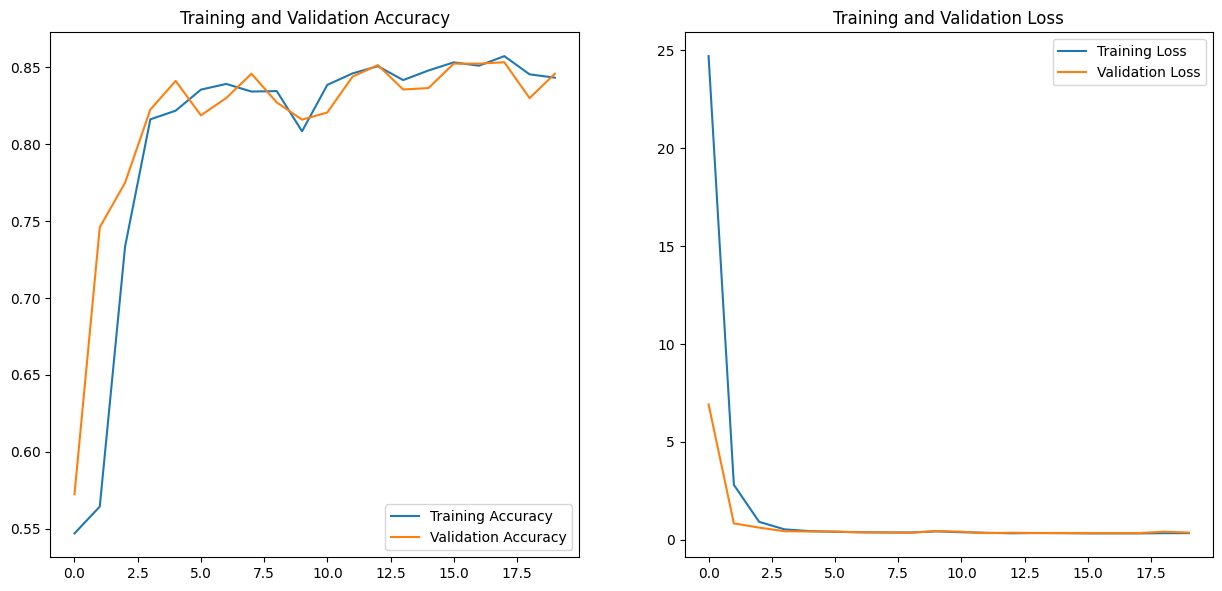

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
_, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


from sklearn.metrics import classification_report
#x_test,y_true = test_iterator.next()
pred = model.predict(X_test)

#predictions = predictions.reshape(1,-1)[0]
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
#print(predictions)
#print(y_pred)

#print(x)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names = ['No (Class 0)','doji (Class 1)']))

Test Accuracy: 86.275
                precision    recall  f1-score   support

  No (Class 0)       0.85      0.93      0.89       644
doji (Class 1)       0.88      0.76      0.82       427

      accuracy                           0.86      1071
     macro avg       0.87      0.85      0.85      1071
  weighted avg       0.86      0.86      0.86      1071



**Marubozu**

---



Determing Target Label

Bullish Marubozu - 1

Bearish Marubozu - 2

None - 0

In [ ]:
def maru(df):
  if(abs(df.Open-df.Close)/max(df.Open,df.Close) >=0.01):
    if((abs(df.Open-df.Low)/max(df.Open,df.Low) <=0.005) & (abs(df.Close-df.High)/max(df.Close,df.High) <=0.005)):
      return 1
    elif((abs(df.Open-df.High)/max(df.Open,df.High) <=0.005) & (abs(df.Close-df.Low)/max(df.Close,df.Low) <=0.005)):
      return 2
    else:
      return 0
  else:
    return 0

df['Marubozu'] = df.apply(maru, axis = 1)
df['Marubozu'] = df['Marubozu'].astype(int)
df['Marubozu'].to_csv( "Y_marubozu.csv")

**Loading Target Label**

In [17]:
y=pd.read_csv('/content/gdrive/My Drive/candlestick_patterns/Y_marubozu.csv')
print(y.iloc[:,1].value_counts())
y  = to_categorical(y.iloc[:,1])
y.shape

0    4284
1     601
2     468
Name: Marubozu, dtype: int64


(5353, 3)

**Initializing the CNN Model**

In [18]:
def modelmaru():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  #model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024,kernel_initializer='normal',activation="relu"))
  #model.add(Dropout(0.4))
  #model.add(Dense(256,kernel_initializer='normal',activation="relu"))
  model.add(Dense(3, activation="softmax"))

  model.summary()

  return model

In [20]:
X_train,y_train,X_val,y_val,X_test,y_test = split(data,y)

**Model Training**

In [21]:
from tensorflow.keras.optimizers import SGD
model=modelmaru()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=256, epochs=15,validation_data=(X_val,y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              31491072  
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 3075      
Total params: 31,495,043
Trainable params: 31,495,043
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


13/13 [==============================] - 2s 94ms/step - loss: 14.3507 - accuracy: 0.7132 - val_loss: 9.5707 - val_accuracy: 0.8002
Epoch 2/15
13/13 [==============================] - 1s 65ms/step - loss: 4.0082 - accuracy: 0.8119 - val_loss: 0.2347 - val_accuracy: 0.8711
Epoch 3/15
13/13 [==============================] - 1s 64ms/step - loss: 0.5641 - accuracy: 0.8471 - val_loss: 0.3250 - val_accuracy: 0.8739
Epoch 4/15
13/13 [==============================] - 1s 65ms/step - loss: 0.2207 - accuracy: 0.8841 - val_loss: 0.1869 - val_accuracy: 0.8898
Epoch 5/15
13/13 [==============================] - 1s 66ms/step - loss: 0.1667 - accuracy: 0.8935 - val_loss: 0.1647 - val_accuracy: 0.8898
Epoch 6/15
13/13 [==============================] - 1s 65ms/step - loss: 0.1565 - accuracy: 0.8985 - val_loss: 0.1627 - val_accuracy: 0.8954
Epoch 7/15
13/13 [==============================] - 1s 65ms/step - loss: 0.1526 - accuracy: 0.8950 - val_loss: 0.1716 - val_accuracy: 0.8824
Epoch 8/15
13/13 [=====

**Plotting Results**

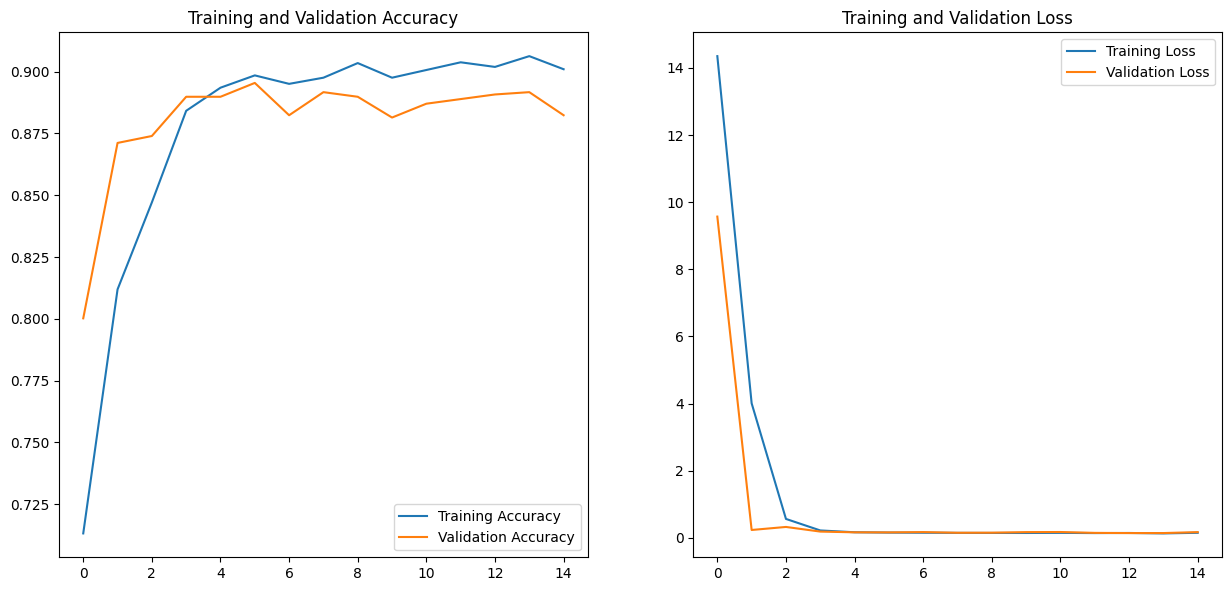

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
_, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


from sklearn.metrics import classification_report
#x_test,y_true = test_iterator.next()
pred = model.predict(X_test)
#predictions = predictions.reshape(1,-1)[0]
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
#print(predictions)
#print(y_pred)

#print(x)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Test Accuracy: 88.235
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       852
           1       0.88      0.56      0.69       121
           2       0.80      0.46      0.58        98

    accuracy                           0.88      1071
   macro avg       0.86      0.67      0.73      1071
weighted avg       0.88      0.88      0.87      1071



**Shooting Star / Umbrella**

Determing Target Label

Paper Umbrella - 1

Shooting Star - 2

None - 0

In [ ]:
import os
def umbrella_star(df):
  #Paper Umbrella
  if((abs(df['Open']-df['Close'])/max(df['Open'],df['Close']) <=0.02)  & ((min(df['Close'],df['Open'])-df['Low'] )>=2*abs(df['Open']-df['Close'])) ):
    if(  (abs(df['High']-df['Open'])/max(df['Open'],df['High']) <=0.005) |   (abs(df['High']-df['Close'])/max(df['Close'],df['High']) <=0.005) ):
      return 1
    else:
      return 0       
  #Shooting Star
  elif((abs(df['Open']-df['Close'])/max(df['Open'],df['Close']) <=0.02) &   ((df['High']-max(df['Open'],df['Close']) )>=2*abs(df['Open']-df['Close']))  ):
    if((abs(df['Close']-df['Low'])/max(df['Close'],df['Low']) <=0.005) | (abs(df['Low']-df['Open'])/max(df['Open'],df['Low']) <=0.005) ):
      return 2
    else:
      return 0
  else:
    return 0

df['Umbrella/Star'] = df.apply(umbrella_star, axis = 1)
df['Umbrella/Star'] = df['Umbrella/Star'].astype(int)
df['Umbrella/Star'].to_csv("Y_umbrella_star.csv")

**Loading Target Label**

In [24]:
y=pd.read_csv('/content/gdrive/My Drive/candlestick_patterns/Y_umbrella_star.csv',index_col="Date")
y  = to_categorical(y)
y.shape

(5353, 3)

**Initializing the CNN Model**

In [31]:
def model_umbrella_star():

  model = Sequential()
  model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  #model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform' ,activation='relu', input_shape=(64,64,3)))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(1024,kernel_initializer='normal',activation="relu"))
  #model.add(Dropout(0.4))
  #model.add(Dense(256,kernel_initializer='normal',activation="relu"))
  model.add(Dense(3, activation="softmax"))

  model.summary()

  return model

In [40]:
X_train,y_train,X_val,y_val,X_test,y_test = split(data,y)

**Model Training**

In [41]:
from tensorflow.keras.optimizers import SGD
model=model_umbrella_star()
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128, epochs=5,validation_data=(X_val,y_val))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              31491072  
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 3075      
Total params: 31,495,043
Trainable params: 31,495,043
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


26/26 [==============================] - 2s 54ms/step - loss: 14.4788 - accuracy: 0.7920 - val_loss: 4.6589 - val_accuracy: 0.8151
Epoch 2/5
26/26 [==============================] - 1s 42ms/step - loss: 1.4633 - accuracy: 0.7717 - val_loss: 0.2958 - val_accuracy: 0.8739
Epoch 3/5
26/26 [==============================] - 1s 42ms/step - loss: 0.2331 - accuracy: 0.8661 - val_loss: 0.1731 - val_accuracy: 0.8758
Epoch 4/5
26/26 [==============================] - 1s 43ms/step - loss: 0.1769 - accuracy: 0.8845 - val_loss: 0.2377 - val_accuracy: 0.8992
Epoch 5/5
26/26 [==============================] - 1s 42ms/step - loss: 0.1962 - accuracy: 0.8795 - val_loss: 0.2357 - val_accuracy: 0.8683


**Plotting Results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(5)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [43]:
_, acc = model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy: %.3f' % (acc * 100))


from sklearn.metrics import classification_report
#x_test,y_true = test_iterator.next()
pred = model.predict(X_test)

#predictions = predictions.reshape(1,-1)[0]
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)
#print(predictions)
#print(y_pred)

#print(x)
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Test Accuracy: 87.862
              precision    recall  f1-score   support

           0       0.99      0.87      0.93       864
           1       0.55      1.00      0.71       141
           2       0.86      0.73      0.79        66

    accuracy                           0.88      1071
   macro avg       0.80      0.87      0.81      1071
weighted avg       0.93      0.88      0.89      1071

